In [91]:
import pandas as pd
import numpy as np
import requests
import pprint
from matplotlib import pyplot as plt
import seaborn as sns

In [92]:
#Endpoint TSE com resultados atualizados - 10s:
url='https://resultados.tse.jus.br/oficial/ele2022/544/dados-simplificados/br/br-c0001-e000544-r.json'

#Fazendo a requisição na URL:
re=requests.get(url).json()
candidatos = re['cand'][:10]

In [93]:
df=pd.DataFrame(candidatos)
df=df[['nm','n','dvt','vap','pvap']]
df.rename(columns={'nm':'Nome do Candidato',
                'n':'Numero do Candidato',
                'dvt':'Validade',
                'vap':'Votos',
                'pvap':'(%) Votos'}, inplace=True)

df['Horario Atualização']=re['hg']
df['(%) Votos']=df['(%) Votos'].str.replace(',','.')
df['(%) Votos']=df['(%) Votos'].astype(float)
df['Votos']=df['Votos'].astype(int)
df['Nome do Candidato']=df['Nome do Candidato'].str.replace('D&apos;',"D'")
df=df.sort_values(by='Votos', ascending=False)

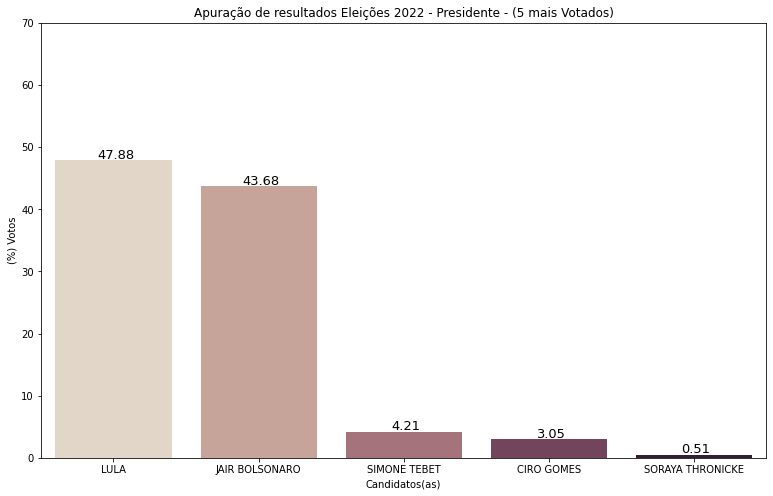

In [94]:
fig, axs = plt.subplots(ncols=1, figsize=(13,8))

ax1 = sns.barplot(
    x="Nome do Candidato",
    y='(%) Votos',
    data=df[:5],
    palette="ch:.25",
    ax=axs)

ax1.set(xlabel="Candidatos(as)",
        ylabel="(%) Votos",
        title="Apuração de resultados Eleições 2022 - Presidente - (5 mais Votados)",
        ylim=(0,70))


# Adicionando rotulo com valores no gráfico ax1:
for p in ax1.patches:
            ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=13, color='black', xytext=(2, 5),
                textcoords='offset points')

plt.show()


In [95]:
df

,Nome do Candidato,Numero do Candidato,Validade,Votos,(%) Votos,Horario Atualização
0,LULA,13,Válido,54995039,47.88,21:27:27
1,JAIR BOLSONARO,22,Válido,50167598,43.68,21:27:27
2,SIMONE TEBET,15,Válido,4839583,4.21,21:27:27
3,CIRO GOMES,12,Válido,3508366,3.05,21:27:27
4,SORAYA THRONICKE,44,Válido,584042,0.51,21:27:27
5,FELIPE D'AVILA,30,Válido,552996,0.48,21:27:27
6,PADRE KELMON,14,Válido,78363,0.07,21:27:27
7,LÉO PÉRICLES,80,Válido,52800,0.05,21:27:27
8,SOFIA MANZANO,21,Válido,44732,0.04,21:27:27
9,VERA,16,Válido,25092,0.02,21:27:27


In [96]:
print (f'Seções Totais: {re["s"]}')
print (f'Seções Apuradas: {re["st"]}')
pct=int(re['st'])/int(re['s'])*100
diff=round((df['(%) Votos'].iloc[0]-df['(%) Votos'].iloc[1]),4)
print (f'Percentual de Seções apuradas: {round(pct,4)}%')
print(f'Diferença entre Lula e Bolso**ro: {diff} P.P. ({df["Nome do Candidato"].iloc[0]})')


Seções Totais: 472075
Seções Apuradas: 458290
Percentual de Seções apuradas: 97.0799%
Diferença entre Lula e Bolso**ro: 4.2 P.P. (LULA)


In [97]:
#Coletando sessões apuradas por estados:
url2='https://resultados.tse.jus.br/oficial/ele2022/544/dados/br/br-e000544-ab.json'
re_uf=requests.get(url2).json()
ufs = re_uf['abr'][:28]

In [98]:
df_uf2=pd.DataFrame(ufs)
df_uf2=df_uf2[['cdabr','pst','ht']]
df_uf2.rename(columns={'cdabr':'UF (Unidade Federativa)',
                'pst':'(%) Sessões Apuradas',
                'ht':'Horário'}, inplace=True)
df_uf2['(%) Sessões Apuradas']=df_uf2['(%) Sessões Apuradas'].str.replace(',','.')
df_uf2['(%) Sessões Apuradas']=df_uf2['(%) Sessões Apuradas'].astype(float)
df_uf2=df_uf2.sort_values(by='UF (Unidade Federativa)', ascending=True)
#df_uf2['UF (Unidade Federativa)']=df_uf2['UF (Unidade Federativa)'].str.replace('ZZ','Sessões no Exterior')

In [99]:
df_uf2.head()

,UF (Unidade Federativa),(%) Sessões Apuradas,Horário
16,AC,98.54,21:24:43
20,AL,87.97,21:27:06
0,AM,97.16,21:26:59
23,AP,99.60,21:21:22
21,BA,92.57,21:27:00


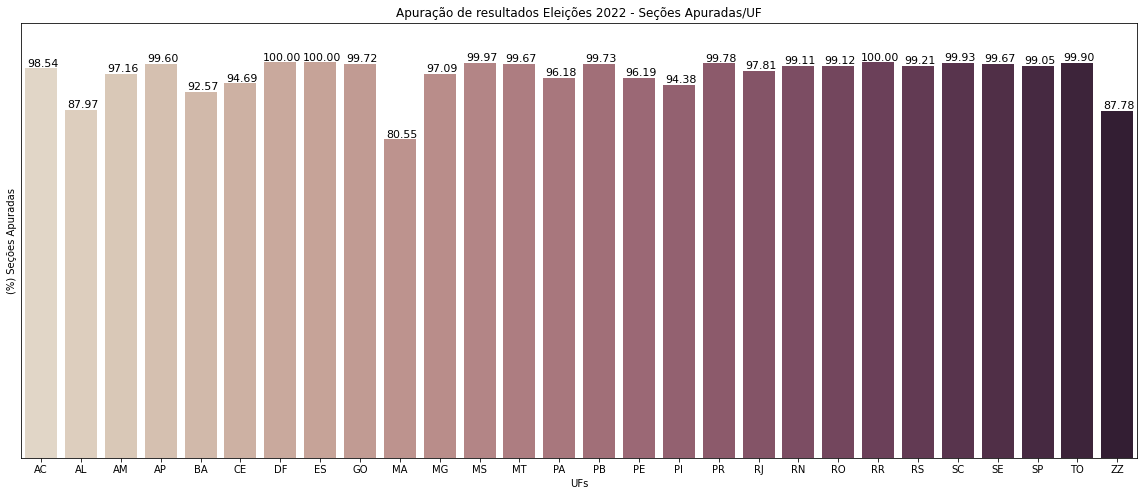

In [100]:
#Plot: Sessões Apuradas por UF:
fig, axs = plt.subplots(ncols=1, figsize=(20,8))

ax1 = sns.barplot(
    x="UF (Unidade Federativa)",
    y='(%) Sessões Apuradas',
    data=df_uf2,
    palette="ch:.25",
    ax=axs)

ax1.set(xlabel="UFs",
        ylabel="(%) Seções Apuradas",
        title="Apuração de resultados Eleições 2022 - Seções Apuradas/UF",
        ylim=(0,110),
        yticks=[])


# Adicionando rotulo com valores no gráfico ax1:
for p in ax1.patches:
            ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(2, 5),
                textcoords='offset points')

plt.show()